<a href="https://colab.research.google.com/github/Bingurrr/slam/blob/main/feature_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Detection

OpenCV를 사용하여 다음과 같은 다양한 feature detection 알고리즘을 사용해본다.

- Harris corner detection
- FAST
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html)
- [이미지 특징 추출 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/7eb4b2a440824bb0a8c2c7ce3da7a4e2/)


In [1]:

# !pip uninstall opencv-contrib-python
# !pip uninstall opencv-python
# !pip install opencv-python==3.4.2.17
# !pip install opencv-contrib-python==3.4.2.17

In [ ]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
numpy 1.19.5
opencv 3.4.2


## Google Drive와 연동하기

구글 드라이브와 colab을 연동하여 드라이브에 있는 파일들을 가져올 수 있게 한다.

- 아래 코드를 실행
- 출력된 링크를 클릭해 구글 계정 로그인 
- 로그인 후 나오는 코드를 복사하여 붙여넣기

[참고: 코랩 사용법 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


좌측의 파일 아이콘을 선택하거나 아래 명령어를 통해 파일을 확인할 수 있다.

In [ ]:
!ls '/content/drive/MyDrive/slam/hw1/feature'

DPP_0010.JPG  DPP_0011.JPG  DPP_0013.JPG


In [ ]:
ROOT = '/content/drive/MyDrive/slam/hw1/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

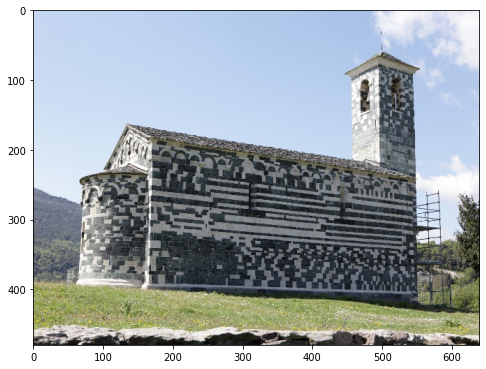

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])  
plt.show()

## Harris Corner Detection

해리스 코너 추출 함수 `cornerHarris`는 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점을 찾는다.

- 해리스 코너를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
`dst	=	cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)` 


In [ ]:
#from google.colab.patches import cv2_imshow

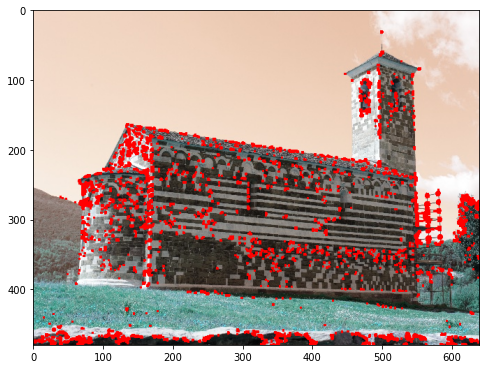

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do

dst = cv.cornerHarris(gray,3,3,0.01)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.

img[dst>0.03*dst.max()]=[255,0,0]
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.show()


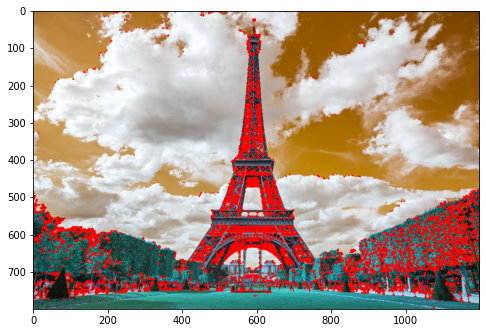

In [ ]:
root = '/content/drive/MyDrive/slam/hw1/test/에펠탑.jpg'
img = cv.imread(root)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do

gray = np.float32(gray)
dst = cv.cornerHarris(gray,3,3,0.01)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.03*dst.max()]=[255,0,0]
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.show()

### Fast Corner Detection 

연산이 빠른 corner detection 알고리즘이다 



- FAST feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.FastFeatureDetector_create(	[, threshold[, nonmaxSuppression[, type]]]	)`

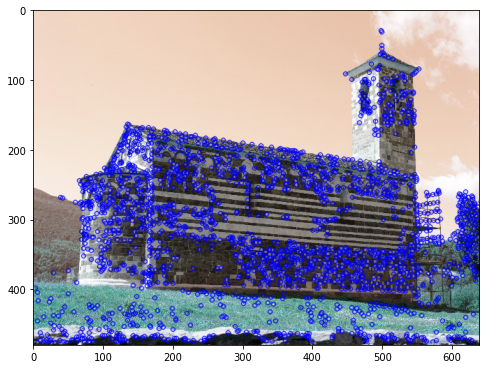

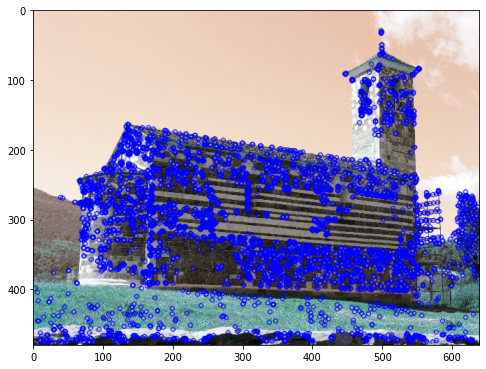

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
fast = cv.FastFeatureDetector_create(60) #인자값이 커지면 검출하는 키포인트가 줄어든다.

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(0,0,255))
plt.figure(figsize = (8,8))
plt.imshow(img2)
plt.show()


# Disable nonmaxSuppression
fast.setNonmaxSuppression(0) #Suppression을 false로 두고 키포인트를 검출한다
kp = fast.detect(img,None)
img3 = cv.drawKeypoints(img, kp, None, color=(0,0,255))
plt.figure(figsize = (8,8))
plt.imshow(img3)
plt.show()


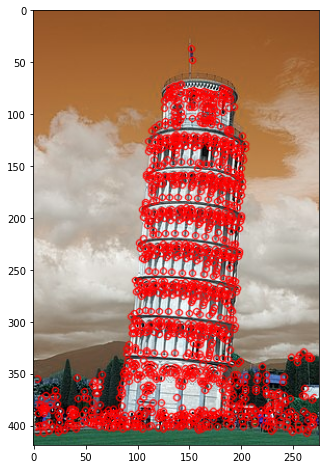

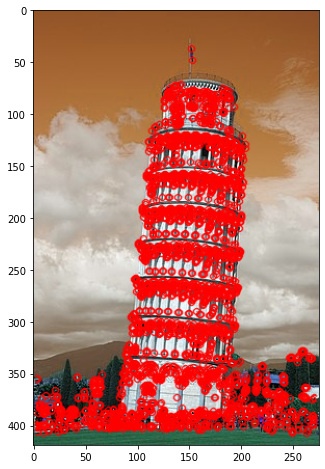

In [ ]:
root = '/content/drive/MyDrive/slam/hw1/test/피사의사탑.jpeg'
img = cv.imread(root)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
fast = cv.FastFeatureDetector_create(60) #인자값이 커지면 검출하는 키포인트가 줄어든다.

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
plt.figure(figsize = (8,8))
plt.imshow(img2)
plt.show()


# Disable nonmaxSuppression
fast.setNonmaxSuppression(0) #Suppression을 false로 두고 키포인트를 검출한다
kp = fast.detect(img,None)
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
plt.figure(figsize = (8,8))
plt.imshow(img3)
plt.show()

### ORB(Oriented FAST and Rotated BRIEF) detector

FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 논문에서는 SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘이라 소개 한다.


-  ORB feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.ORB_create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	)`


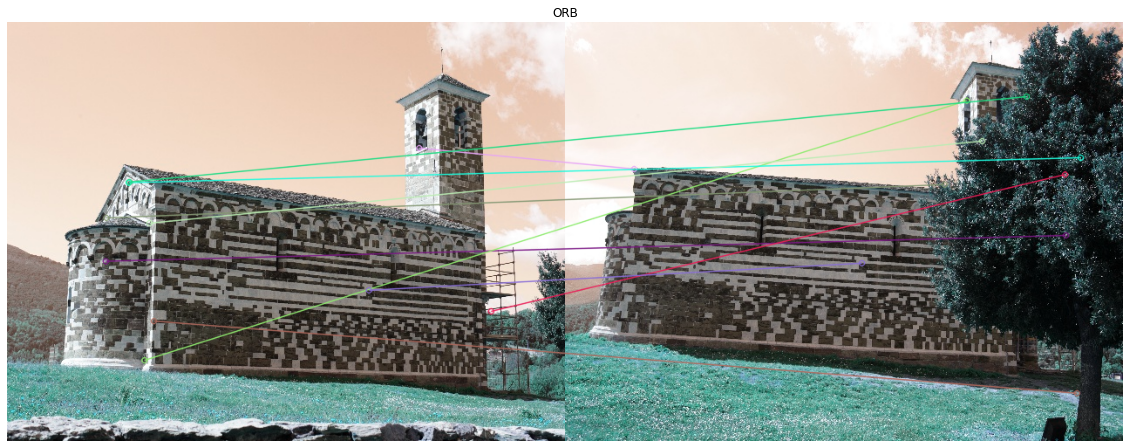

In [ ]:
img1 = cv.imread( ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread( ROOT + 'feature/DPP_0013.JPG')
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# To-do
orb = cv.ORB_create(500)
kps, des = orb.detectAndCompute(img1, None)
kps_r, des_r = orb.detectAndCompute(img2, None)

bf = cv.BFMatcher_create()
matches = bf.knnMatch(des, des_r, k=2)

good = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good.append([m])

np.random.shuffle(good)
image_match = cv.drawMatchesKnn(
    img1, kps, img2, kps_r, good[:10], flags=2, outImg=img1)

plt.figure(figsize = (20,20))
plt.imshow(image_match)
plt.title("ORB")
plt.axis("off")
plt.show()


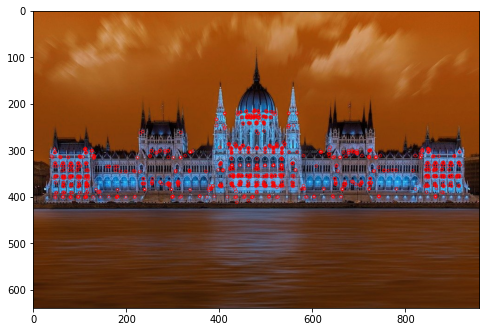

In [ ]:
root = '/content/drive/MyDrive/slam/hw1/test/부다페스트.jpg'

img = cv.imread(root)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
orb = cv.ORB_create(1000)
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img = cv.drawKeypoints(img, kp, None, color=(255,0,0),  flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.show()


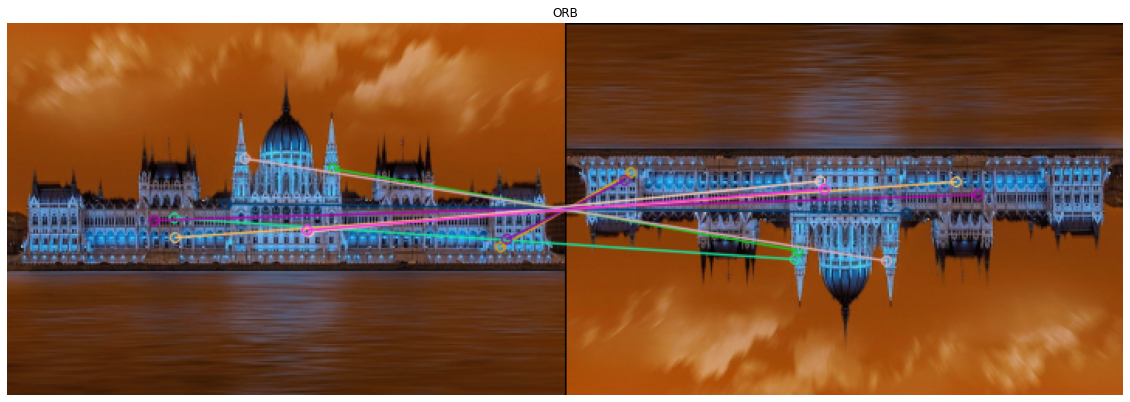

In [ ]:
root = '/content/drive/MyDrive/slam/hw1/test/부다페스트.jpg'

img1 = cv.imread(root)
img1 = cv.resize(img1, dsize=(360, 240), interpolation=cv.INTER_AREA)
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
H = cv.getRotationMatrix2D((180, 120), 180, 1)
img2 = cv.warpAffine(img1, H, (360, 240))
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# To-do
orb = cv.ORB_create(1000)
kps, des = orb.detectAndCompute(img1, None)
kps_r, des_r = orb.detectAndCompute(img2, None)

bf = cv.BFMatcher_create()
matches = bf.knnMatch(des, des_r, k=2)

good = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good.append([m])

np.random.shuffle(good)
image_match = cv.drawMatchesKnn(
    img1, kps, img2, kps_r, good[:10], flags=2, outImg=img1)

plt.figure(figsize = (20,20))
plt.imshow(image_match)
plt.title("ORB")
plt.axis("off")
plt.show()

### SIFT feature detection

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.


- SIFT feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`retval	=	cv.SIFT_create(	[, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]	)
`

In [ ]:
# 아래 패키지를 임포트한다 
#!pip install opencv-contrib-python

In [ ]:
img1 = cv.imread( ROOT + 'feature/DPP_0013.JPG')
img2 = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
rgb1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# To-do
retval = cv.SIFT_create()
kp1, des1 = retval.detectAndCompute(gray1,None)
kp2, des2 = retval.detectAndCompute(gray2,None)

test = cv.drawKeypoints(rgb1, kp1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (8,8))
plt.imshow(test)
plt.show()


AttributeError: ignored

In [ ]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.3:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv.drawMatchesKnn(rgb1, kp1, rgb2, kp2,
                                good_match[0:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)

plt.show()

In [ ]:
root = '/content/drive/MyDrive/slam/hw1/test'
img1 = cv.imread( root + '/맨해튼다리.JPG')
img2 = cv.imread( root + '/맨해튼다리2.JPG')
img1 = cv.resize(img1, dsize=(480, 360), interpolation=cv.INTER_AREA)
img2 = cv.resize(img2, dsize=(480, 360), interpolation=cv.INTER_AREA)

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
rgb1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# To-do
retval = cv.SIFT_create()
kp1, des1 = retval.detectAndCompute(gray1,None)
kp2, des2 = retval.detectAndCompute(gray2,None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.7:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv.drawMatchesKnn(rgb1, kp1, rgb2, kp2,
                                good_match[0:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)

plt.show()

### SURF feature detection


SURF(Speeded-Up Robust Features)는 인텐서티 계산 방법을 간략화 하는 등의 방법으로 SIFT 방법의 속도와 안정성을 개선한 것이다. 


- SURF feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
- `retval	=	cv.xfeatures2d.SURF_create(	[, hessianThreshold[, nOctaves[, nOctaveLayers[, extended[, upright]]]]]	)
`


In [ ]:
#cv.xfeatures2d.SURF_create을 돌리기위해서 opencv 버전을 downgrade했습니다.

# !pip uninstall opencv-contrib-python
# !pip uninstall opencv-python
# !pip install opencv-python==3.4.2.17
# !pip install opencv-contrib-python==3.4.2.17

# !pip install opencv-python
# !pip install opencv-contrib-python

In [ ]:
# !pip3 install -U opencv-contrib-python==3.4.2.17

In [ ]:
img1 = cv.imread( ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread( ROOT + 'feature/DPP_0013.JPG')
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# To-do
retval = cv.xfeatures2d.SURF_create(300)

k1, d1 = retval.detectAndCompute(img1, None)
k2, d2 = retval.detectAndCompute(img2, None)

kp0 = k1[0]

In [ ]:
bf = cv.BFMatcher_create()
matches = bf.knnMatch(d1, d2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

np.random.shuffle(good)
image_match = cv.drawMatchesKnn(
    img1, k1, img2, k2, good[:20], flags=2, outImg=img1)

pts_x = [kp.pt[0] for kp in k1]
pts_y = [kp.pt[1] for kp in k1]
pts_s = [kp.size / 10 for kp in k1]

plt.figure(figsize=(10, 10))
plt.imshow(img1, cmap='gray')
plt.title("SURF")
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_match)
plt.title("SURF")
plt.show()

In [ ]:
root = '/content/drive/MyDrive/slam/hw1/test/'

img1 = cv.imread( root + '에펠탑.jpg')
img2 = cv.imread( root + '에펠탑2.jpg')
img1 = cv.resize(img1, dsize=(360, 240), interpolation=cv.INTER_AREA)
img2 = cv.resize(img2, dsize=(360, 240), interpolation=cv.INTER_AREA)
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
rgb1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# To-do
retval = cv.xfeatures2d.SURF_create(0)

k1, d1 = retval.detectAndCompute(img1, None)
k2, d2 = retval.detectAndCompute(img2, None)

kp0 = k1[0]


bf = cv.BFMatcher_create()
matches = bf.knnMatch(d1, d2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

np.random.shuffle(good)
image_match = cv.drawMatchesKnn(
    img1, k1, img2, k2, good[:30], flags=2, outImg=img1)



plt.figure(figsize=(20, 20))
plt.imshow(image_match)
plt.title("SURF")
plt.show()

In [ ]:
root = '/content/drive/MyDrive/slam/hw1/test/'

img1 = cv.imread( root + '피사의사탑.jpeg')
img1 = cv.resize(img1, dsize=(360, 240), interpolation=cv.INTER_AREA)

H = cv.getRotationMatrix2D((180, 120), 180, 1)
img2 = cv.warpAffine(img1, H, (360, 240))

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
rgb1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# To-do
retval = cv.xfeatures2d.SURF_create(0)

k1, d1 = retval.detectAndCompute(img1, None)
k2, d2 = retval.detectAndCompute(img2, None)

kp0 = k1[0]


bf = cv.BFMatcher_create()
matches = bf.knnMatch(d1, d2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

np.random.shuffle(good)
image_match = cv.drawMatchesKnn(
    img1, k1, img2, k2, good[:40], flags=2, outImg=img1)



plt.figure(figsize=(20, 20))
plt.imshow(image_match)
plt.title("SURF")
plt.show()

### 추가 점수 과제

- 지금까지 사용해본 feature detection 알고리즘들을 조사해 보고, 각 알고리즘간의 차이와 장단점을 서술하시오.

1. Harris Corner Detection

  원리 : 사진,영상 안에 있는 하나의 윈도우를 상하좌우로 조금씩 이동을 시킨다. 만약에 코너점일 경우에는 모든 방향으로 사진, 영상의 변화가 크다는 원리를 이용했다. 그래디언트 변화량을 이용한다.

  장점 : 영상의 평행이동, 회전변화에는 불변이고 조명 변화에는 어느정도 강인성을 가지고 있다.

  단점 : 스케일에는 영향을 받그 때문에 여러 영상 스케일에서 특징점을 뽑을 필요가 있다. Fast corner detection에 비해 비교적 속도가 느리다.

2. Fast Corner 

  원리 : 한 점 p를 선정합니다. 이 점을 중심으로 하는 원을 그리고 원상의 픽셀값들을 보고 코너점인지 아닌지 판단을 합니다. p보다 일정값 이상 밝은 픽셀들이 n개 이상 연속되어 있거나 또는 어두운 필셀들이 n개 이상 연속되어 있으면 점 p를 코너점으로 판단합니다.

  장점 : 속도가 빠르다. 이전의 feature detection(Harris Corner Detection)의 검출 속도를 개선을 했다.
  
  단점 : 점 p가 코너점으로 인식이 되면 p와 인접한 주변 점들도 같이 코너점으로 검출되는 문제들이 많이 생꼇다. 이를 해결하기 위해서는 non-maximal suppresssion라 불리는 후처리 단계를 적용해주면 된다.
3. ORB detector

  원리 : Fast와 BRIEF를 이용하여 만들어 졌다. FAST Detection으로 코너 특징 점을 구하고 특징점을 기준으로 행렬의 변환과 BRIEF를 적용한다.(SIFT, SURF를 개선하였다.)

  장점 : 무료로 사용할 수 있다. 속도가 빠르다. 임베디드 환경에서 적합하지 않는 SIFT, SURF의 대체 수단으로 제시되고 있다. 빠르고 정확하다.

  단점 : 크기에 대한 keypoint 정보가 없어서 크기 변화에 약하다. SIFT처럼 주변 화소의 그래디언트 방향 선분을 갖고 있찌 않다.
4. SIFT feature detection

  원리 : Harris에서 나타나는 스케일 변화에 대한 문제점을 해결하기위해 Dog를 기반을 이미지 내에서 뿐만 아니라 스케일 축으로도 코너성이 극대인 점을 찾습니다.

  장점 : Harrisc Corner Detection의 스케일 문제를 보완하였다. 크기, 회전 두가지에 대해서 불변하는 특징점을 추출한다. 안정성은 좋았다.

  단점 : 속도가 느리다는 단점이 있다. 각각의 방향을 기록을 하고, 높이값들을 누적해서 계산을 해야한다. 컴퓨터가 값들을 비교해 줄 때 양이 많아지게 된다. 

5. SURF feature detection

  원리 : SIFT의 속도를 계산한 방식이다. 계산량을 줄이기 위해 적분이미지를 사용하여 계산을 하였다. 

  장점 : SIFT에 비해 속도가 빠르다. SIFT보다 더 효율적이다.

  단점 : 스케일 조절에 제한이 있을 수 있다. view point의 변화나 조명 변화에 약하다.

